# Projet de Simulation et Monte Carlo: Marches aléatoires autosécantes

Pour un entier $t \in \mathbb{N}^* $, on appelle **chaîne/marche aléatoire à** $t$ pas $\hspace{0.15cm}$ tout $(t+1)$-uplet $$X=(X_0,X_1,...,X_t)\in (\mathbb{Z}^d)^{t+1}$$
tel que $$ \forall\hspace{0.15cm} 1\leq k\leq t \hspace{0.15cm}  X_k = X_{k-1} + \eta_k $$
où $\eta_k \sim U \{\pm e_i , 1\leq i\leq d \} $ $e_i$ étant le $i^{ème}$ vecteur de la base canonique de $\mathbb{R}^d$ et $X_0 = 0$

On notera $\mathcal{C}_t$ l'ensemble des marches aléatoires à t pas.
**Dans toute la suite nous avons considéré** $d=2$ pour faciliter l'illustration des résultats, mais les algorithmes utilisés sont généralisables à $d$ quelconque.

Pour $X\in \mathcal{C}_t$, on appelle **marches aléatoires autosécantes (ou autosécantes ou MAAS)** de $X$ les $n_{X}$ (qu'on notera $n$ pour plus de simplicité) portions de $X$ suivantes

$$(X_{K_0},X_1,...,X_{K_1 - 1}), (X_{K_1},...,X_{K_1 + K_2 -1}),...,(X_{\sum_{i=1}^{n-1}K_i},...,X_{\sum_{i=1}^{n}K_i-1})$$

Propriétés :

$(a) \hspace{3cm} K_0 = 0, \hspace{0.1cm} \forall\hspace{0.1cm}1\leq i\leq n \hspace{0.15cm} K_i\geq 2 $

$(b) \hspace{3cm}\forall\hspace{0.1cm}1\leq m\leq n \hspace{0.15cm}$ $$\exists! \sum_{j=0}^{m-1}K_j\leq r\leq \sum_{j=0}^{m}K_j - 1 , \hspace{0.15cm}X_r=X_{\sum_{j=0}^{m}K_j}$$ $$\forall \hspace{0.15cm}\sum_{j=0}^{m-1}K_j \leq s< r \leq \sum_{j=0}^{m}K_j - 1,\hspace{0.15cm} X_s\neq X_r$$

$(c)\hspace{3cm}$ $X_t$ est dans la $(n+1)^{ème}$ autosécante

$(a)$ traduit le fait que les autosécantes ont au moins deux éléments (en effet $X_k\neq X_{k-1}$). $(b)$ traduit le fait que chaque autosécante contient des éléments deux à deux distincts et chaque autosécante (hormis la première) débute par un point déjà visité dans la précédente autosécante. Enfin $(c)$ traduit le fait qu'on ne prend pas en compte la dernière portion de la chaîne $X$ afin d'éviter de tronquer prématurément l'autosécante contenant $X_t$.

**Dans cette étude on s'intéresse aux longueurs de ces autosécantes c'est-à-dire les** $l_i = K_i - 1$, $1\leq i\leq n$. On appelera longueur $L_t$ des autosécantes de la chaîne $X$ l'ensemble des valeurs $l_i$. 

L'objectif des deux premières parties de ce travail sera l'évaluation de la loi des longueurs $l_i$. Les deux dernières parties s'intéressent au calcul de la probabilité que le maximum de $L_t$ dépasse une valeur $s$, c'est-à-dire la probabilité qu'il existe une autosécante $i$ de longueur supérieure ou égale à $s$.

## 1. Estimation de la loi de la longueur des marches aléatoires autosécantes

### 1.1 Installation des packages

In [2]:
install_packages <- function(){ 
packages <- c("ggplot2","tidyr","gridExtra")
new.packages <- packages[!(packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)}
install_packages()

library(ggplot2)
library(tidyr)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### 1.2 Simulation de N = 50000 chaînes à  $t=200$ pas

Afin de représenter la loi de la longueur des autosécantes à différentes dates, nous avons simulé $N (=50000)$ chaînes $iid$ $X^{(1)},...,X^{(N)}$ de longueur $t (=200)$
telles que $X^{(k)}\sim U(\mathcal{C}_t)$.

In [6]:
set.seed(1)

t <- 200
N <- 50000

monte_carlo_standard <- function(t,N) {
  longueur <- matrix(ncol=t+1, nrow=N)  # matrice de la longueur de la maas i à la date j
  longueur[,1] <- 0
  for (n in 1:N){
    # On génère une suite aléatoire dans [[0,3]]^(t+1)
    X <- floor(4*runif(t+1))
    # On associe chaque élément à une direction :
    # 0 -> haut : (0,1)
    # 1 -> bas : (0,-1)
    # 2 -> droite : (1,0)
    # 3 -> gauche : (-1,0)
    X <- cbind((X %/% 2)*(1-2*(X %% 2)), (1-X %/% 2)*(1-2*(X %% 2)))
    # On calcule les coordonnées à chaque instant t
    X_coord <- apply(X, 2, cumsum)
    
    # On la divise en marches aléatoires auto-sécantes
    current <- cbind(0,0)
    i <- 1
    
    while (i<=t){
      while(i<=t & !match(TRUE, X_coord[i,1] == current[,1] & X_coord[i,2] == current[,2], nomatch=0)){
        # Tant que le point actuel (X_coord[i,]) n'a pas déjà été visité on l'ajoute à current
        longueur[n,i+1] <- length(current)/2
        current <- rbind(current,X_coord[i,])
        i <- i+1
      }
      current <- matrix(nrow = 0, ncol = 2)  # on réinitialise current
    }
  } 
  return (longueur)
}
start_time <- Sys.time()
longueur <- monte_carlo_standard(t,N)
print(Sys.time() - start_time)

Time difference of 57.9501 secs


L'algorithme simule une marche aléatoire de longueur t puis la divise en MAAS. Il retourne la matrice de la longueur de chaque MAAS $i$ au pas $j$

Sa complexité est de $\mathcal{O}(N)$

### 1.3 Visualisation d'un échantillon de trajectoire


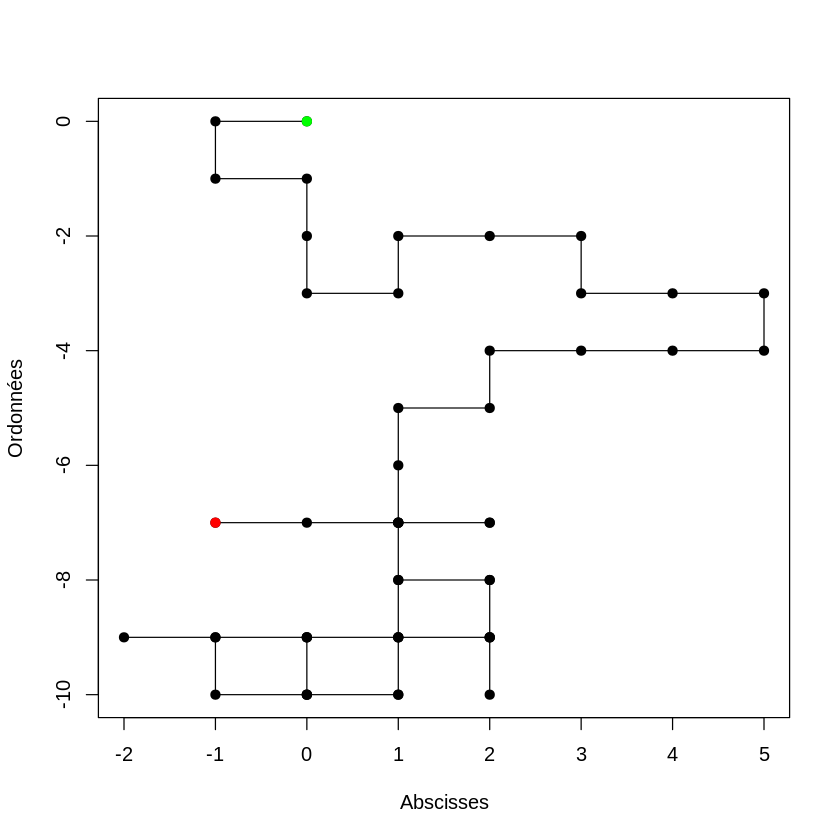

In [14]:
X <- floor(4*runif(t+1))
X <- cbind((X %/% 2)*(1-2*(X %% 2)), (1-X %/% 2)*(1-2*(X %% 2)))
X_coord <- apply(X, 2, cumsum)

plot(rbind(c(0,0),X_coord[1:50,]), type='o', pch=19, xlab='Abscisses', ylab='Ordonnées')
lines(x=0, y=0, col="green", type='o', pch=19)
lines(x=X_coord[50,1], y=X_coord[50,2], col="red", type='o', pch=19)

Il s'agit ici du tracé d'une marche aléatoire $X$ à $t=50$ pas. Le point vert est le point de départ et le point rouge est le dernier point de la simulation. A chaque fois que la trajectoire s'intersecte, on la divise en marches aléatoires autosécantes (MAAS).

### 1.4 Estimation des probabilités qu'une MAAS soit d'une longueur donnée
La longueur d'une MAAS générée dans une marche aléatoire de nombre de pas égal à $t$ est une variable aléatoire de support [[1,t]].
Calculons la densité de cette variable aléatoire par nos simulations Monte Carlo standard :

In [15]:
# Longueurs de toutes les MAAS simulées:
longueur_maas <- longueur[cbind(longueur[,2:t]==0,rep(F,N))]
# ^ vecteur contenant la longueur finale de chaque maas dans chaque simulation
# On ignore la dernière colonne de longueur (par rep(F,N)) pour ne pas tronquer la dernière MAAS avant sa fin
cat("Longueur moyenne :",mean(longueur_maas),"\n")
# Probabilité estimée de chaque longueur :
round(table(longueur_maas)/length(longueur_maas), digits=7)

Longueur moyenne : 3.543582 


longueur_maas
        1         2         3         4         5         6         7         8 
0.2531929 0.1897960 0.1720834 0.1130143 0.0863805 0.0572698 0.0412260 0.0275803 
        9        10        11        12        13        14        15        16 
0.0193929 0.0129604 0.0088718 0.0059392 0.0040368 0.0026929 0.0018502 0.0012324 
       17        18        19        20        21        22        23        24 
0.0008321 0.0005563 0.0003674 0.0002545 0.0001439 0.0001125 0.0000662 0.0000532 
       25        26        27        28        29        30        31        32 
0.0000264 0.0000190 0.0000153 0.0000125 0.0000069 0.0000032 0.0000056 0.0000028 
       33        34        35        36        38 
0.0000009 0.0000005 0.0000005 0.0000005 0.0000005 

**On vérifie ces résultats** :


Presque $25\%$ des MAAS ont une longueur égale à $1$ car pour chaque MAAS, il y a $25\%$ de probabilité que le 2ème mouvement soit l'inverse du premier ce qui résulte en une MAAS de longueur 1.

Presque $19\%$ des MAAS ont une longueur égale à $2$ car pour une MAAS de longeur $l$, $\mathbb{P}(l=2)=\mathbb{P}(l=2|l\geq 2)\times\mathbb{P}(l\geq 2) = 0.25\times(1-0.25)= 18,75\%$ , 
car la seule possibilité d'avoir une MAAS de longueur 2 est que le 3ème mouvement soit l'inverse du 2ème, ceci quel que soit le premier mouvement.

Pour $l\geq 3$, le calcul devient plus compliqué car la probabilité que la MAAS soit de longueur $l$ dépend des pas de la MAAS.

Les probabilités qu'on obtient sont légèrement sur-estimées (de ~$1\%$) car on n'a pas obtenu de MAAS de longueur $> 38$ alors que ces longueurs ont une probabilité non nulle, donc la probabilité est sous-estimée (à $0$) pour $l>38$ et donc sur-estimée pour $l<38$ (car la somme des probabilités $=1$).

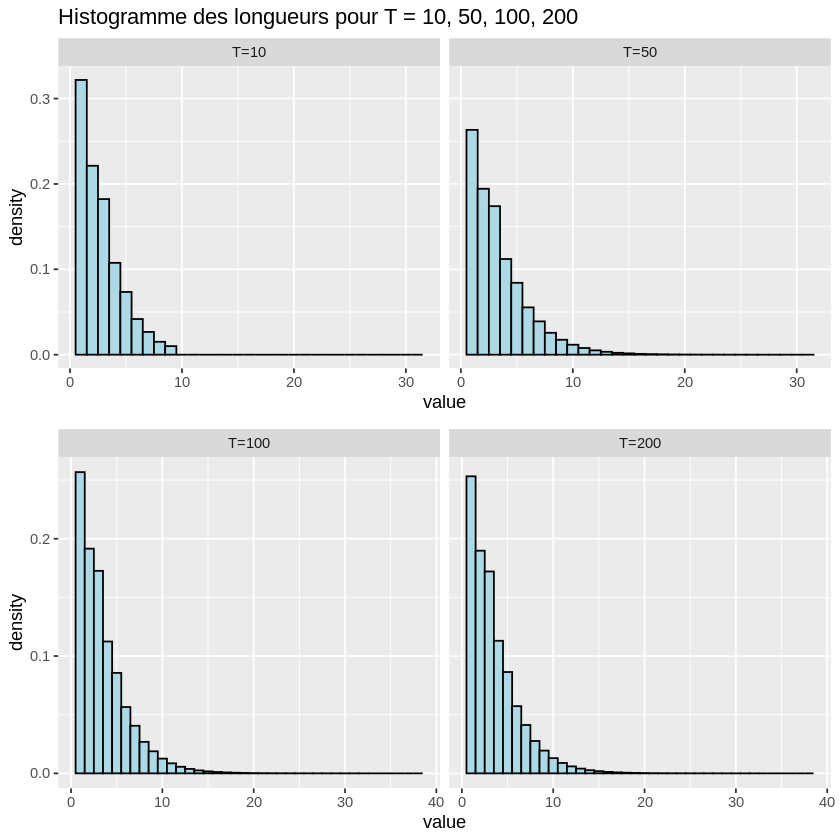

In [16]:
# histogramme des longueurs finales pour des simulations de longueur t=10, t=50, t=100, t=200
hist_longueurs <- function(longueur){
  idx <- cbind(longueur[,2:t]==0,rep(F,N))
  long1 <- longueur[cbind(idx[,1:10], matrix(F,ncol=190,nrow=N))]
  long2 <- longueur[cbind(idx[,1:50], matrix(F,ncol=150,nrow=N))]
  long3 <- longueur[cbind(idx[,1:100], matrix(F,ncol=100,nrow=N))]
  long4 <- longueur[idx]
  l <- list(long1,long2,long3,long4)
  length(long1) <- length(long4)
  length(long2) <- length(long4)
  length(long3) <- length(long4)
  df <- data.frame(long1,long2,long3,long4)
  colnames(df) <- c("T=10","T=50","T=100","T=200")
  df <- gather(df, "T")
  suppressWarnings(
  grid.arrange(
    ggplot(df[df$T %in% c("T=10","T=50"),], aes(x=value)) +
      labs(title="Histogramme des longueurs pour T = 10, 50, 100, 200") +
      geom_histogram(aes(y=..density..), color="black", fill="lightblue", binwidth=1) +
      facet_grid(. ~ T),
    ggplot(df[df$T %in% c("T=100","T=200"),], aes(x=value)) +
      geom_histogram(aes(y=..density..), color="black", fill="lightblue", binwidth=1) +
      facet_grid(. ~ T), nrow=2))
  return(l)
}
long <- hist_longueurs(longueur)

**On constate que la loi des longueurs des MAAS semble se stabiliser à partir de** $T = 100$

### 1.5 Approximation de la loi de la longueur des MAAS pour T = 200 par une loi géométrique

Au vu de la densité des longueurs, on peut essayer de l'approximer par une loi géométrique.

Le paramètre de la loi géométrique est estimé par $\frac{1}{\hat{\mathbb{E}}(l_i)}$ l'inverse de la moyenne empirique des longueurs à la date $T$.

[1] 0.2822003

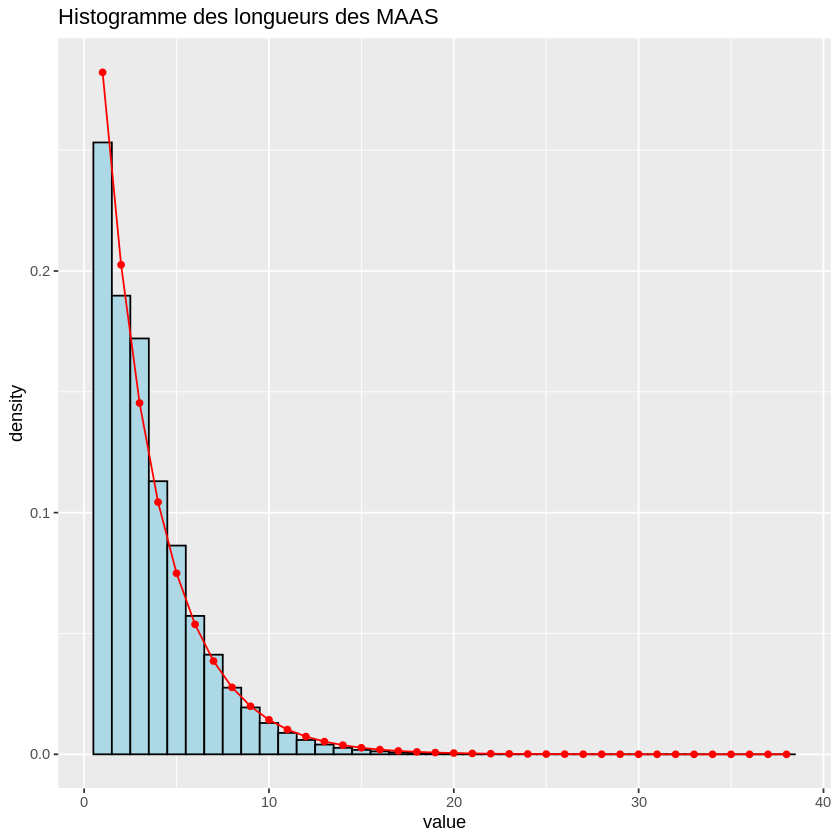

In [18]:
long_maas_moy <- mean(longueur_maas)
1/long_maas_moy

df <- data.frame(longueur_maas)
colnames(df) <- c("Longueurs")
df <- gather(df, "T")

dgeom1 <- function(x){return(dgeom(x-1, prob=(1/long_maas_moy)))}
ggplot(df[df$T =="Longueurs",], aes(x=value)) +
  labs(title="Histogramme des longueurs des MAAS") +
  geom_histogram(aes(y=..density..), color="black", fill="lightblue", binwidth=1)+
  stat_function(fun = dgeom1, n=38, colour = "red")+
  stat_function(geom = "point",fun = dgeom1, n=38, colour = "red")


La loi $\mathcal{G}(0.28)$ semble assez bien approximer la loi des longueurs. On pourrait vérifier cela avec les QQ-plots et un test d'adéquation Chi-2.

#### Q-Q plots

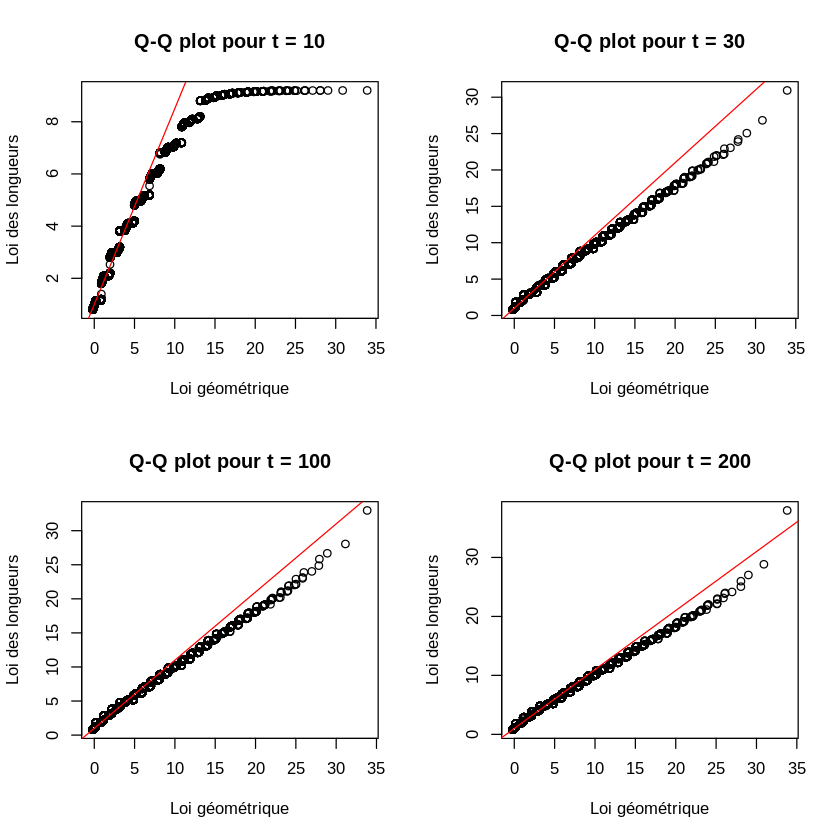

In [19]:
# Q-Q plots
par(mfrow=c(2,2))
quantiles <- qgeom(ppoints(N),prob=1/long_maas_moy)
temps <- c("10","30","100","200")
for (i in 1:4){
  qqplot(jitter(quantiles), jitter(long[[i]]),
          main = paste("Q-Q plot pour t =",temps[i]), xlab="Loi géométrique", ylab="Loi des longueurs")
  qqline(long[[i]], distribution = function(p) qgeom(p, prob=1/long_maas_moy), col = "red")
}
par(mfrow=c(1,1))

On constate que la loi géométrique approche bien les valeurs faibles des longueurs mais surestime les valeurs élevées

#### Test d'adéquation du $\chi^2$

In [20]:
freq_table <- cbind(table(longueur_maas)[1:20], table(rgeom(length(longueur_maas), prob=1/long_maas_moy))[1:20])
chisq.test(freq_table)


	Pearson's Chi-squared test

data:  freq_table
X-squared = 15074, df = 19, p-value < 2.2e-16


**L'hypothèse d'adéquation à la loi géométrique est rejetée par le test du $\chi^2$**. Il ne s'agit pas d'une approximation parfaite de la loi des longueurs.

### 1.6 Autres statistiques sur la longueur des MAAS

Longueur moyenne : 3.560856 
Longueur maximale : 38 
Ecart-type : 2.706005 


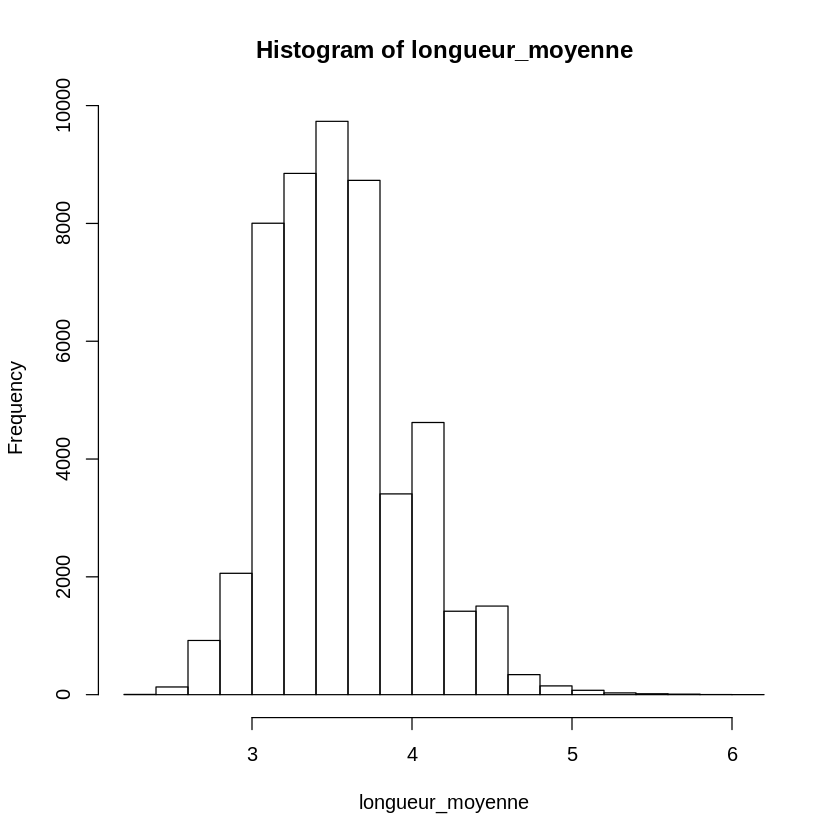

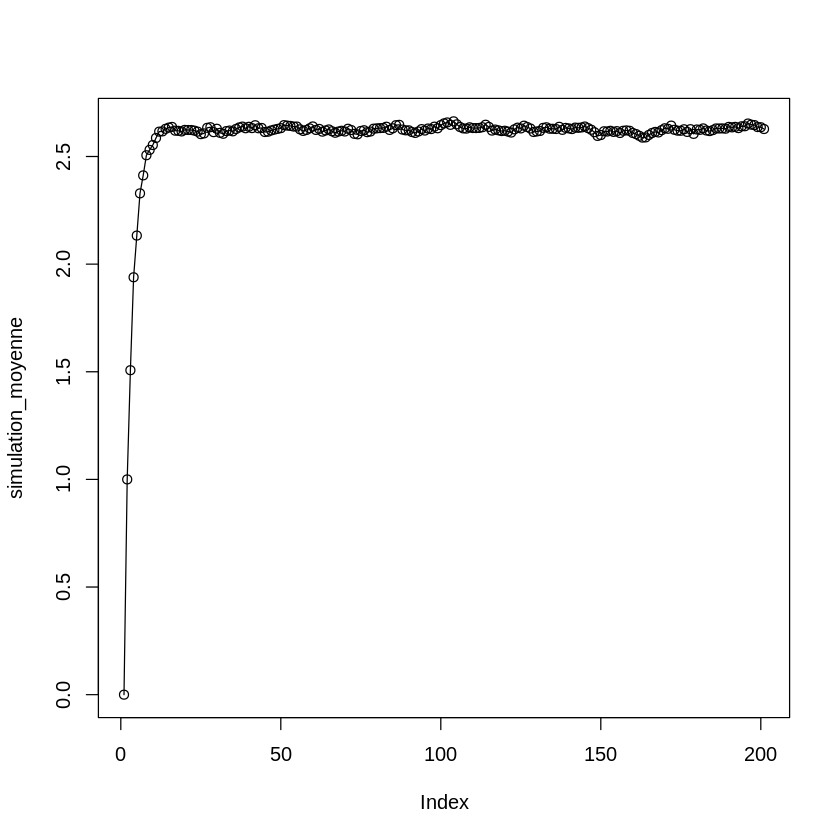

In [21]:
longueur_moyenne <- apply(longueur,1,function(x)(length(x)/sum(x==0)-1))
# ^ la longueur moyenne des MAAS dans chaque simulation (càd dans chaque marche aléatoire de t=200 pas)
cat("Longueur moyenne :", mean(longueur_moyenne),"\n")
hist(longueur_moyenne)
# Par le TCL, les longueurs moyennes tendent vers une normale (centrée sur E(longueur maas)~=3.6)
cat("Longueur maximale :", max(longueur),"\n")
cat("Ecart-type :", sd(longueur),"\n")
simulation_moyenne <- apply(longueur,2,mean)
plot(simulation_moyenne, type='o')

## 2. Une approche plus déterministe pour simuler des chaînes de longueur $T$

Pour $k\in \mathbb{N}^*$ fixé, on simule $N=4k$ chaînes $X^{(1)},...,X^{(N)}$ de longueur $T$ de sorte qu'à chaque étape $m$, $1\leq m\leq T $,

$\hspace{1cm}$ -On duplique $k$ fois chaque direction (étant donné qu'il y a $4$ directions possibles, on se retrouve avec $4k=N$ directions) qu'on alloue aléatoirement aux $N$ marches.

$\hspace{1cm}$ -Pour $ 1\leq k\leq N $ si $\eta_k$ est la direction attribuée à $X^{(k)}$, alors $X^{(k)}_m = X^{(k)}_{m-1} + \eta_k$

Cette approche se rattache au **Quasi-Monte Carlo**, il s'agit d'une approche valide.

### 2.1 Mise en œuvre

#### 2.1.1 Simulation des $N$ trajectoires de longueurs $t$ des MAAS


In [0]:
genere_N_trajectoires <- function(t,N) {
  k <- N/4
  c1 <- c(rep(0,2*k), rep(1,k), rep(-1,k))
  c2 <- c(rep(1,k), rep(-1,k), rep(0,2*k))
  directions <- cbind(c1,c2) # matrice qui comporte toutes les directions possibles
  trajectoires <- matrix(nrow = t, ncol = 2*N) # chaque 2 colonnes représentent une trajectoire (la position (X,Y)) d'une marche aléatoire
  longueur2 <- matrix(ncol=t, nrow=N)
  current <- matrix(nrow = t, ncol = 2*N) # une matrice intermédiare qui comprend les positions des marches avant de se couper 
  longueur2[,1] <- 0
  trajectoires[1,] <- 0
  current[1,] <- trajectoires[1,]
  
  for (i in 2:t) {
    
    c <- sample (1:N)  # génére un vecteur de 1 à N avec un ordre quelconque 
    
    for (j in seq(1:N)) {
      
      direction <- directions[c[j],,drop= F] # on prend la direction choisie selon l'ordre de c
      
      trajectoires[i,c(2*j-1,2*j)] <- trajectoires[i-1,c(2*j-1,2*j)]+direction 
      
      if (!match(TRUE, trajectoires[i,2*j-1] == current[,2*j-1] & trajectoires[i,2*j] == current[,2*j], nomatch=0)){
        # si le point trajectoires[i, c(2*j-1,2*j)] n'existe pas alors on ajoute une longueur à la marche et on ajoute le point à la 
        # matrice current
        longueur2[j,i] <- longueur2[j,i-1]+1
        
        
      }else {
        longueur2[j,i] <- 0
        current [,c(2*j-1,2*j)] <- NaN
        #sinon on réinitialise current [, c(2*j-1,2*j)] et la longueur soit 0 à cette instant 
      }
      current [i,c(2*j-1,2*j)] <- trajectoires [i,c(2*j-1,2*j)]
      # à chaque fois la matrice prend la dernière position atteinte par la MAAS
    }
  }
  
  return(longueur2) # retourner une matrice qui contient N lignes, t colonnes qui represente les N trajectoires de MAAS 
}



#### 2.1.2 Estimation des probabilités qu'une MAAS soit d'une longueur donnée

En premier lieu, nous avons défini une fonction qui nous permet de construire, N trajectoires où à chaque temps t, on répartie équitablement N directions sur les N trajectoires. 
Donc, en deuxieme lieu, nous allons utiliser la fonction précédente afin de simuler $N$ trajectoires et calculer les $\mathbb{P}(l=i)$ où l est la longueur des MAAS.

In [26]:
t <- 200
N <- 50000

longueur2 <- genere_N_trajectoires (t,N)

# Longueurs de toutes les maas simulées:
longueur_maas2 <- longueur2[cbind(longueur2[,2:ncol(longueur2)]==0,rep(F,nrow(longueur2)))]
t2<-table(factor(longueur_maas2))
t2 / sum(t2)


           1            2            3            4            5            6 
2.529849e-01 1.892725e-01 1.720731e-01 1.130533e-01 8.669155e-02 5.712191e-02 
           7            8            9           10           11           12 
4.174530e-02 2.751983e-02 1.935903e-02 1.288348e-02 8.984896e-03 5.941909e-03 
          13           14           15           16           17           18 
4.015780e-03 2.742348e-03 1.876563e-03 1.199314e-03 8.384544e-04 5.517123e-04 
          19           20           21           22           23           24 
3.766096e-04 2.617275e-04 1.667644e-04 1.056175e-04 7.319105e-05 5.327196e-05 
          25           26           27           28           29           30 
3.844846e-05 2.408819e-05 1.436027e-05 7.874986e-06 6.022048e-06 5.095579e-06 
          31           32           33           34           35           36 
5.558814e-06 1.389703e-06 9.264689e-07 9.264689e-07 1.389703e-06 4.632345e-07 
          37 
4.632345e-07 

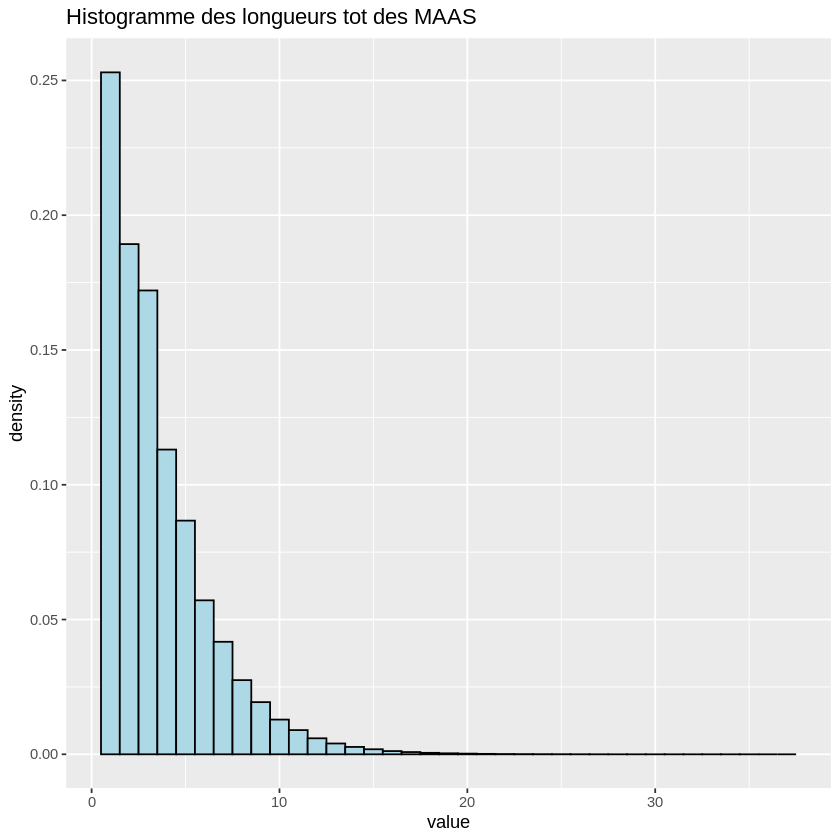

In [27]:
df1 <- data.frame(longueur_maas2)
colnames(df1) <- c("Longueurs")
df1 <- gather(df1, "T")
ggplot(df1[df1$T =="Longueurs",], aes(x=value)) +
  labs(title="Histogramme des longueurs tot des MAAS") +
  geom_histogram(aes(y=..density..), color="black", fill="lightblue", binwidth=1)

### 2.2 Comparaison avec l'algorithme Monte-Carlo standard

#### 2.2.1 Comparaison entre la loi par la méthode de monte carlo et celle déterminée par la méthode de quasi monte carlo

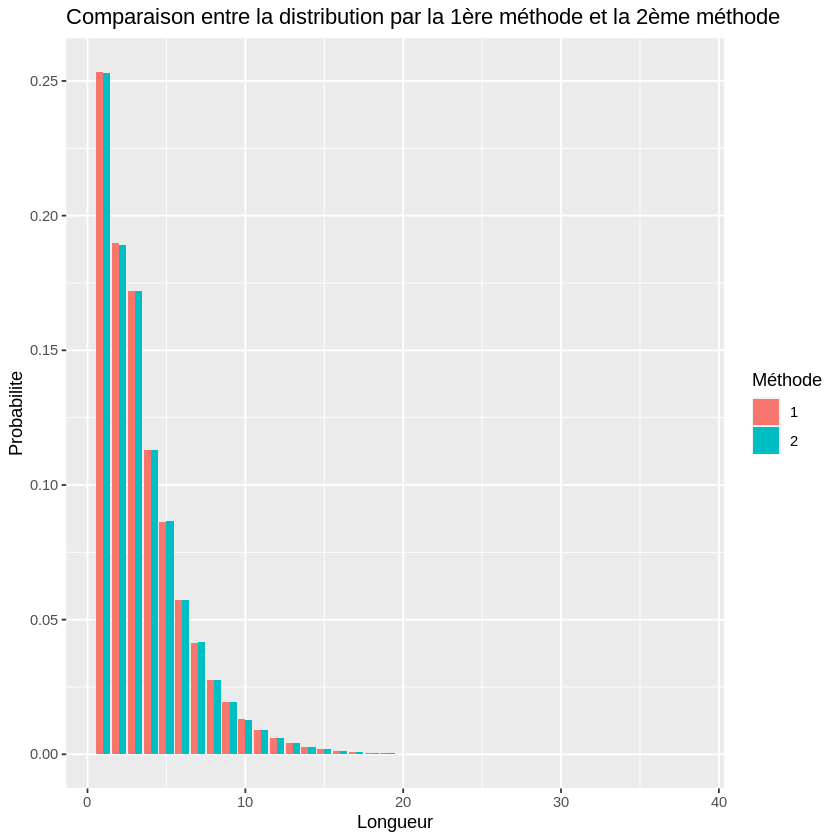

In [28]:
# comparaison entre les 2 histogrammes :
m <- max(max(longueur_maas),max(longueur_maas2))
t<-table(factor(longueur_maas, levels = 1:m))
t2<-table(factor(longueur_maas2, levels = 1:m))
t <- t/sum(t)
t2 <- t2/sum(t2)
x <- seq(1,length(t))
d <- data.frame(as.vector(t), as.vector(t2), x)
colnames(d)<-c("t","t2","x")
d <- pivot_longer(d, cols=c('t', 't2'), names_to='Methode', 
                  values_to="Probabilite")
ggplot(d, aes(x=x, y=Probabilite, fill=Methode)) +
  geom_bar(stat='identity', position='dodge') +
  labs(x = "Longueur",title = "Comparaison entre la distribution par la 1ère méthode et la 2ème méthode") +
  scale_fill_discrete(name = "Méthode", labels = c("1", "2"))



Les deux méthodes donnent des lois empiriques très proches.

In [29]:
freq_table <- cbind(t,t2)
chisq.test(freq_table)

Warning message in chisq.test(freq_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  freq_table
X-squared = 1.5918e-05, df = 37, p-value = 1


Le test Chi2 ne rejette pas l'hypothèse d'adéquation des deux longueurs à la même loi.

#### 2.2.2 Comparaison des variances des deux méthodes

Dans cette partie, l'algorithme se manifeste de cette manière: 


> A chaque fois:

> on simule N (=**2000** dans cette exemple) Marches aléatoires auto-sécantes


> on stocke les probabilités $\mathbb{P}(l=i)$  



et on répéte ces instructions **100** fois pour le premier estimateur et également pour le deuxième afin de calculer la variance des estimateurs.




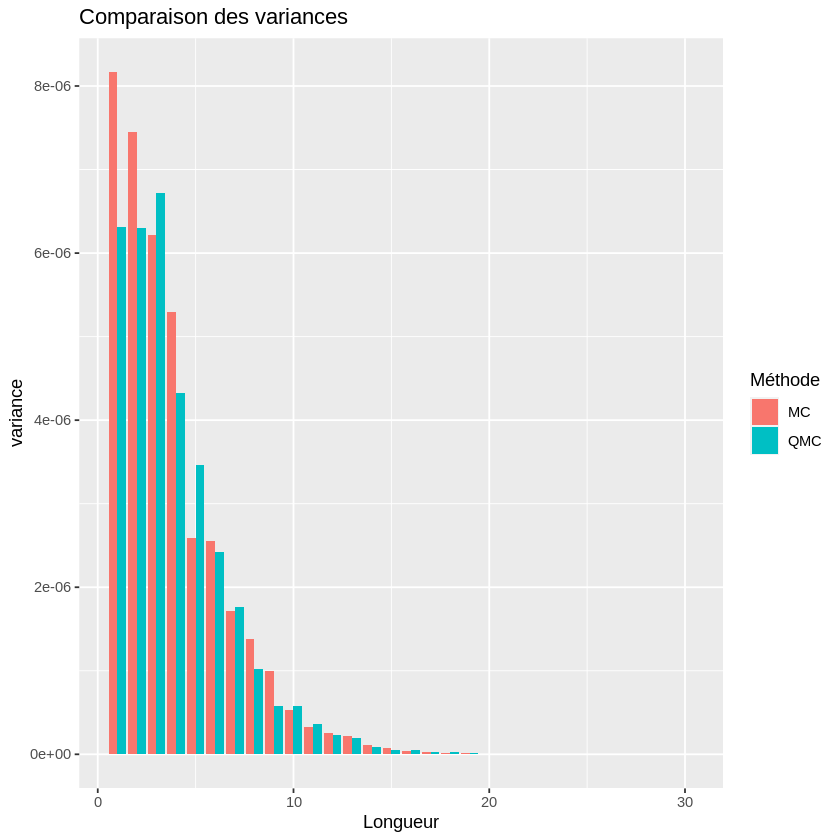

In [33]:

# Comparaison des variances
# Ce code prend 3 minutes pour s'exécuter
set.seed(0)

t <- 50
N <- 2000
matrice_proba <- matrix(nrow=30,ncol=100)
for (i in 1:100) {
  longueur <- monte_carlo_standard(t,N)
  # Longueurs de toutes les maas simulées:
  longueur_maas <- longueur[cbind(longueur[,2:ncol(longueur)]==0,rep(F,nrow(longueur)))]
  t2<-table(factor(longueur_maas, levels = 1:30))
  matrice_proba[,i] <-(t2 / sum(t2))
}  


matrice_proba2 <- matrix(nrow=30,ncol=100)
for (i in 1:100) {
  longueur <- genere_N_trajectoires(t,N)
  # Longueurs de toutes les maas simulées:
  longueur_maas2 <- longueur[cbind(longueur[,2:ncol(longueur)]==0,rep(F,nrow(longueur)))]
  t2<-table(factor(longueur_maas2, levels = 1:30))
  matrice_proba2[,i] <-(t2 / sum(t2))
}  

var_MC <- apply(matrice_proba ,1, var) #calculer la variance de chaque P (X =i) en utilisant le 1er estimateur 

var_QMC <- apply(matrice_proba2, 1, var)  #calculer la variance de chaque P (X =i) en utilisant le 2ème estimateur

x <- seq(1,30)
g <- data.frame(var_MC, var_QMC, x)
colnames(g)<-c("proba1","proba2","x")
g <- pivot_longer(g, cols=c('proba1', 'proba2'), names_to='Methode', 
                  values_to="variance")
ggplot(g, aes(x=x, y=variance, fill=Methode)) +
  geom_bar(stat='identity', position='dodge') +
  labs(x = "Longueur",title = "Comparaison des variances") +
  scale_fill_discrete(name = "Méthode", labels = c("MC", "QMC"))


Les variances calculées permettent également de donner des intervalles de confiance pour les estimations des probabilités :

In [37]:
l=1
cat("P(l =",l,") : ", mean(matrice_proba[l,]), "\n")
dev <- qnorm(0.975)/sqrt(N)*sqrt(var_MC[l])
cat("Intervalle de confiance : [", mean(matrice_proba[l,])-dev, ", ",mean(matrice_proba[l,])+dev,"]")


P(l = 1 ) :  0.2631472 
Intervalle de confiance : [ 0.263022 ,  0.2632725 ]

On note que l'intervalle de confiance est étroit même pour N assez faible.

## 3. Importance sampling

### 3.1 Application directe de l'importance sampling


Pour estimer la probabilité que pour une marche aléatoire à $T$ pas on obtient une MAAS de longueur dépassant un seuil $s$, on peut tenter d'utiliser les estimations faites plus haut de la probabilité qu'une MAAS soit d'une longueur donnée. Cependant cette méthode sous-estime la probabilité pour des valeurs assez grandes de $s$ (par exemple $s\geq 40$). En effet l'algorithme Monte-Carlo standard devient imprécis dès que la probabilité de l'évènement à simuler est inférieure à $10^{-4}$ (il faudrait en moyenne 10000 simulations pour obtenir une réalisation). On peut résoudre ce problème par Importance Sampling en utilisant une loi de proposition qui génère des MAAS plus longues.

Afin de générer avec une plus grande probabilité des MAAS de plus grande longueur une possibilité est de privilégier deux directions en leur accordant une plus importante probabilité d'être empruntées à chaque pas. Ci-dessous une méthode privilégiant haut et droite :

[1] 1.089680e-05 1.052686e-03 1.669765e-06 2.012383e-05

[1] 1.6002079 2.4582835 2.2129912 1.0030293 0.7719417

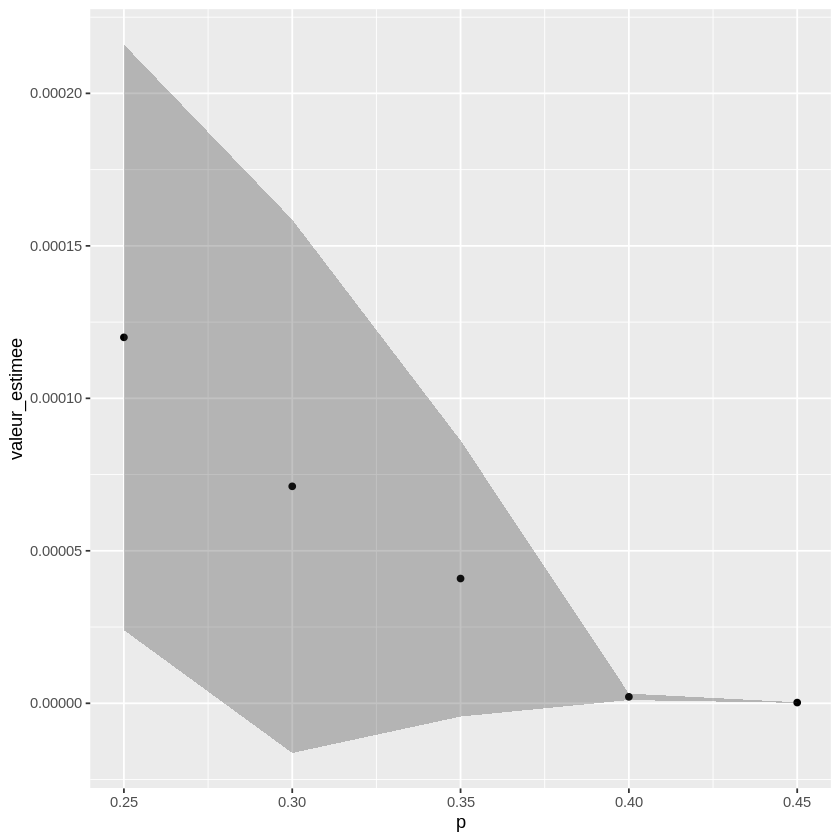

In [38]:
# On définit les probabilités des directions comme (p, p, q, q) pour augmenter ou diminuer la probabilité d'aller en haut ou à droite
# q = 0.5-p est une constante de normalisation

importance_sampling <- function(p,t,s,N){
  q <- 0.5-p
  longueur <- matrix(ncol=t, nrow=N)  # matrice de la longueur de la maas i à la date j
  poids <- vector(length=N) # poids de la simulation i
  nb_hd <- vector(length=N) # nombre de pas en haut ou à droite de la simulation i
  start_time <- Sys.time()
  directions <- function(x){
      # On associe chaque x entre 0 et 1 à une direction avec probabilités (p,p,q,q):
      if (x<p){return(c(1,0))}
      else if (x<2*p){return(c(0,1))}
      else if (x<2*p+q){return(c(-1,0))}
      else{return(c(0,-1))}
  }
  for (n in 1:N){
      # On génère une suite aléatoire dans [[0,3]]^(t+1)
      X <- runif(t+1)
      # On calcule le poids de la marche aléatoire générée
      nb_hd[n] <- sum(X[-length(X)]<2*p)
      poids[n] <- (p^nb_hd[n])*(q^(t-nb_hd[n]))
      # On associe chaque élément à une direction :
      X <- matrix(unlist(lapply(X, directions)), ncol=2, byrow=TRUE)
      # On calcule les coordonnées à chaque instant t
      X_coord <- apply(X, 2, cumsum)

      # On la divise en marches aléatoires auto-sécantes
      current <- cbind(0,0)
      i <- 1
      
      while (i<=t){
          while(i<=t & !match(TRUE, X_coord[i,1] == current[,1] & X_coord[i,2] == current[,2], nomatch=0)){
              # Tant que le point actuel (X_coord[i,]) n'a pas déjà été visité on l'ajoute à current
              longueur[n,i] <- length(current)/2
              current <- rbind(current,X_coord[i,])
              i <- i+1
          }
          current <- matrix(nrow = 0, ncol = 2)  # on réinitialise current
      }
  }

  Pm <- apply(longueur, 1, function(x){max(x)>=s})
  # Résultat :
  valeur_estimee <- sum(Pm/poids)/(4^t)/N
  ecart_type = sqrt( 1/N * sum( (Pm/poids/(4^t) - valeur_estimee)^2))
  borne_inf_intervalle_confiance = valeur_estimee - qnorm(0.975)  * sqrt(1/N) * ecart_type
  borne_sup_intervalle_confiance = valeur_estimee + qnorm(0.975) * sqrt(1/N) * ecart_type
  return(c(valeur_estimee, ecart_type, borne_inf_intervalle_confiance, borne_sup_intervalle_confiance))
}
importance_sampling(0.35, 50, 30, 50000)

estimation <- c()
for (p in seq(0.25,0.45,0.05)){
  estimation <- rbind(estimation,importance_sampling(p, 50, 30, 50000))
} 
df <- data.frame(cbind(estimation, seq(0.25,0.45,0.05)))
colnames(df) <- c("valeur_estimee", "ecart_type", "borne_inf", "borne_sup", "p")
ggplot(df, aes(p, valeur_estimee))+
  geom_point()+
  geom_abline(intercept=0, slope=1)+
  geom_ribbon(aes(ymin=borne_inf,ymax=borne_sup),alpha=0.3)

# largeur relative moyenne de l'intervalle de confiance :
(estimation[,4]-estimation[,3])/estimation[,1]


On note que les écarts-types ont été calculés d'après la formule proposée dans [1].
Bien qu'avec cette méthode l'évènement cherché se réalise beaucoup plus souvent, ses estimations sont assez erratiques avec des intervalles de confiance dépassant 100% de la valeur estimée. 

En augmentant $p$, l'intervalle de confiance se resserre un peu mais les estimations obtenues varient significativement à chaque exécution : En effet, en s'éloignant de la loi de départ, la variance de l'estimateur par importance sampling augmente et les poids associés aux simulations tendent vers 0.



### 3.2 Estimation à l'aide de l'algorithme myope

On cherche encore à estimer la probabilité que la longueur des MAAS d'une chaîne de longueur $t$ dépasse un certain seuil $s$. Formellement, en utilisant les notations de départ, on veut **évaluer** 
$$\begin{align}
\mathbb{P}(\exists \hspace{0.15cm} 1\leq i\leq n \hspace{0.15cm} l_i\geq s ) & = \mathbb{P}\bigg(\bigcup_{K=0}^{t-s} \Big( (\tilde{l}_K = 0) \cap ( \tilde{l}_{K+s} = s )\Big) \bigg) \text{ On partionne en les possibilités d'avoir une MAAS de longueur au moins $s$}
\\  & = \sum_{K=0}^{t-s} \mathbb{P}\Big( (\tilde{l}_K = 0) \cap ( \tilde{l}_{K+s} = s )\Big) \text{ car l'évènement ci-dessus est une partition}
\\ & = \sum_{K=0}^{t-s} \mathbb{P}(\tilde{l}_K = 0). \mathbb{P}\Big( \tilde{l}_{K+s} = s \big|\hspace{0.1cm}\tilde{l}_K = 0 \Big)
\\ & = \sum_{K=0}^{t-s} \mathbb{P}(\tilde{l}_K = 0). \mathbb{P}(\tilde{l}_{s} = s) \text{ la probabilité qu'une MAAS soit d'une longueur ne dépend pas du pas par lequel elle débute }
\\ & = \mathbb{P}(\tilde{l}_{s} = s) \bigg( \sum_{K=0}^{t-s} \mathbb{P}(\tilde{l}_K = 0)\bigg)
\end{align}$$

Où on note pour une MAAS de longueur $l$, $\tilde{l}_j$ le $j^{ème}$ pas effectué dans la MAAS, $\tilde{l}_j = 0$ signifie que la MAAS débute avec le point $X_j$ (ou au pas $j$) de la chaîne $X$ à laquelle la MAAS appartient.

Ces probabilités sont calculées selon la loi uniforme sur $\mathcal{C}_t$.

Pour calculer la probabilité cherchée il faudra évaluer 2 termes :

Le facteur $\bigg( \sum_{K=0}^{t-s} \mathbb{P}(\tilde{l}_K = 0)\bigg)$ peut être estimé grâce aux simulations faites dans la première partie puisqu'il ne s'agit pas d'un évènement rare.

Afin d'estimer $\mathbb{P}(\tilde{l}_{s} = s)$  nous utilisons un algorithme d'**importance sampling** afin de **générer avec une plus grande probabilité des chaînes plus longues**. 

On commence d'abord par vérifier que la formule de calcul donnée plus haut est correcte empiriquement pour des valeurs de s qu'on peut évaluer:

#### Vérification des résultats

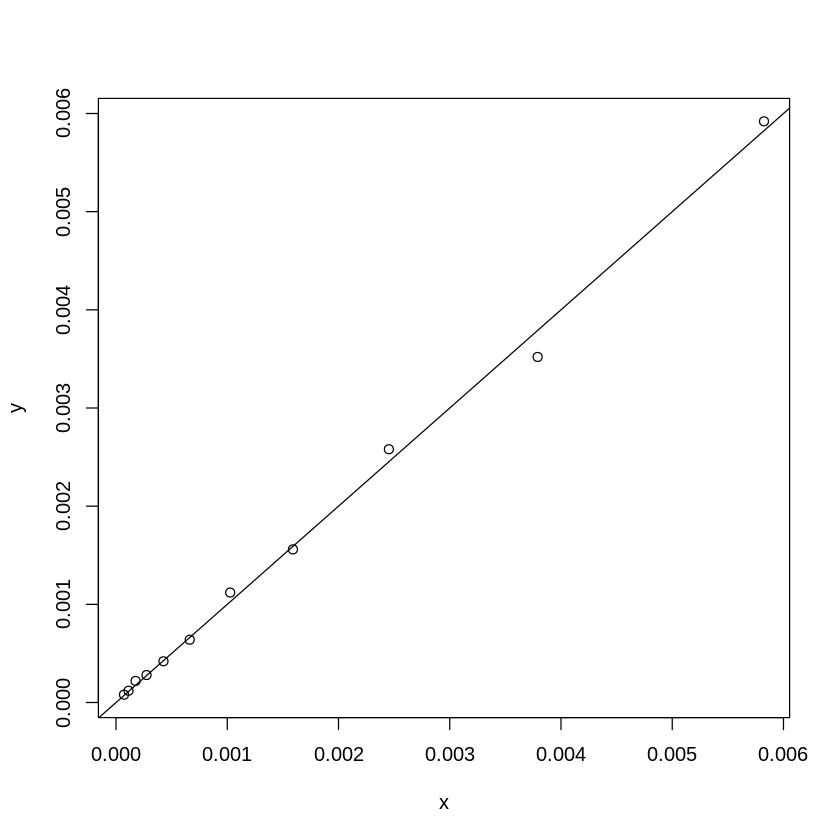

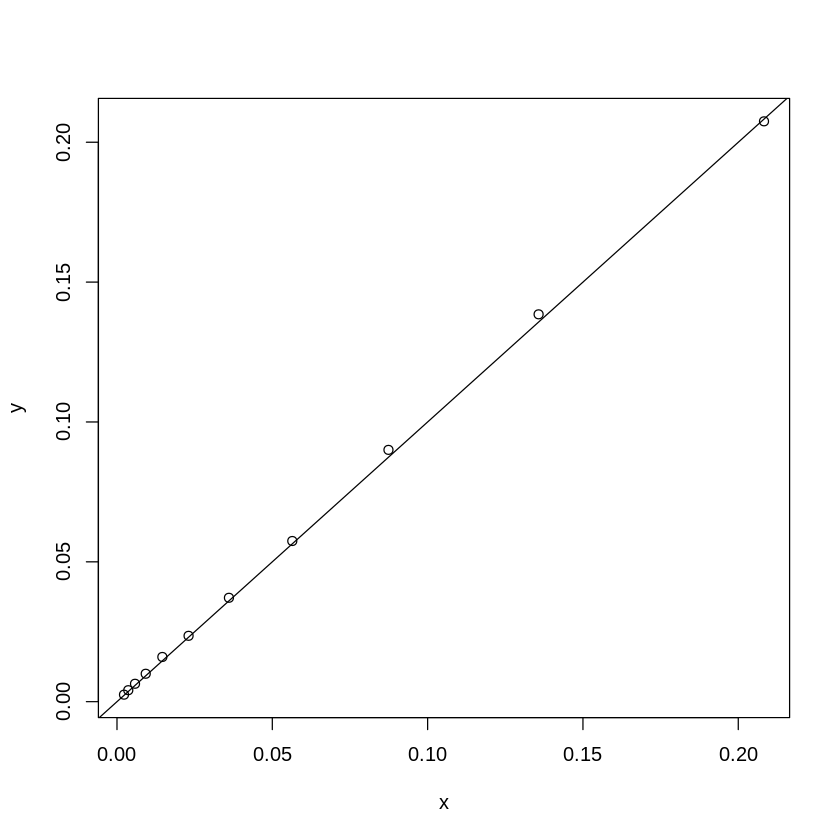

In [39]:
#On vérifie que la formule de calcul donne bien la probabilité qu'une marche aléatoire de taille t dépasse une longueur l.
# Pour t = 50



# Meme code que 1. mais avec t=50
set.seed(1)
t <- 50
N <- 50000
longueur <- matrix(ncol=t+1, nrow=N)  # matrice de la longueur de la maas i à la date j
longueur[,1] <- 0
start_time <- Sys.time()
for (n in 1:N){
# On génère une suite aléatoire dans [[0,3]]^(t+1)
X <- floor(4*runif(t+1))
# On associe chaque élément à une direction :
# 0 -> haut : (0,1)
# 1 -> bas : (0,-1)
# 2 -> droite : (1,0)
# 3 -> gauche : (-1,0)
X <- cbind((X %/% 2)*(1-2*(X %% 2)), (1-X %/% 2)*(1-2*(X %% 2)))
# On calcule les coordonnées à chaque instant t
X_coord <- apply(X, 2, cumsum)

# On la divise en marches aléatoires auto-sécantes
current <- cbind(0,0)
i <- 1

while (i<=t){
  while(i<=t & !match(TRUE, X_coord[i,1] == current[,1] & X_coord[i,2] == current[,2], nomatch=0)){
    # Tant que le point actuel (X_coord[i,]) n'a pas déjà été visité on l'ajoute à current
    longueur[n,i+1] <- length(current)/2
    current <- rbind(current,X_coord[i,])
    i <- i+1
  }
  current <- matrix(nrow = 0, ncol = 2)  # on réinitialise current
}
}


# P(L(Xt)=t) (valeurs théoriques dans la littérature [2]; par la suite on va utiliser l'importance sampling pour les calculer):
P_theorique  <- c(4, 12, 36, 100, 284, 780, 2172,
   5916, 16268, 44100, 120292, 324932, 881500, 
   2374444, 6416596, 17245332, 46466676, 
   124658732, 335116620, 897697164, 
   2408806028, 6444560484, 17266613812, 46146397316, 123481354908, 329712786220, 
   881317491628, 2351378582244, 6279396229332, 16741957935348, 44673816630956, 
   119034997913020, 317406598267076, 845279074648708, 2252534077759844, 
   5995740499124412, 15968852281708724, 42486750758210044, 113101676587853932, 
   300798249248474268, 800381032599158340, 2127870238872271828, 
   5659667057165209612, 15041631638016155884, 39992704986620915140, 
   106255762193816523332, 282417882500511560972, 750139547395987948108, 
   1993185460468062845836, 5292794668724837206644)
P_theorique  <- P_theorique/(4^seq(1,50))


###
x<-c()  # probas(max(L)>=l) d'après la formule
y <- c()  # probas(max(L)>=l) obtenues réellement par la simulation
P0 <- apply((longueur==0), 2, sum)/N
for (l in 20:30){
  tl <- t - l
  s <- 0
  for (k in 1:tl){
    s <- s+P0[k]*P_theorique[l]
  }
  x <- c(x,s)
  Pm <- apply(longueur, 1, function(x){max(x)>=l})
  y <- c(y,sum(Pm)/N)
}
plot(x,y)
abline(0,1)



# On réessaye avec t = 30 :

set.seed(1)
t <- 30
N <- 50000
longueur <- matrix(ncol=t+1, nrow=N)  # matrice de la longueur de la maas i à la date j
longueur[,1] <- 0
start_time <- Sys.time()
for (n in 1:N){
# On génère une suite aléatoire dans [[0,3]]^(t+1)
X <- floor(4*runif(t+1))
# On associe chaque élément à une direction :
# 0 -> haut : (0,1)
# 1 -> bas : (0,-1)
# 2 -> droite : (1,0)
# 3 -> gauche : (-1,0)
X <- cbind((X %/% 2)*(1-2*(X %% 2)), (1-X %/% 2)*(1-2*(X %% 2)))
# On calcule les coordonnées à chaque instant t
X_coord <- apply(X, 2, cumsum)

# On la divise en marches aléatoires auto-sécantes
current <- cbind(0,0)
i <- 1

while (i<=t){
  while(i<=t & !match(TRUE, X_coord[i,1] == current[,1] & X_coord[i,2] == current[,2], nomatch=0)){
    # Tant que le point actuel (X_coord[i,]) n'a pas déjà été visité on l'ajoute à current
    longueur[n,i+1] <- length(current)/2
    current <- rbind(current,X_coord[i,])
    i <- i+1
  }
  current <- matrix(nrow = 0, ncol = 2)  # on réinitialise current
}
}



x<-c()  # probas(max(L)>=l) d'après la formule
y <- c()  # probas(max(L)>=l) obtenues réellement par la simulation
P0 <- apply((longueur==0), 2, sum)/N  # P(L_k=0) utilisés dans la formule
for (l in 10:20){
  tl <- t - l
  s <- 0
  for (k in 1:tl){
    s <- s+P0[k]*P_theorique[l]
  }
  x <- c(x,s)
  Pm <- apply(longueur, 1, function(x){max(x)>=l})
  y <- c(y,sum(Pm)/N)
}
plot(x,y)
abline(0,1)



En traçant les probabilités empiriques et les probabilités calculées avec la formule (en utilisant les valeurs théoriques de $\mathbb{P}(\tilde{l}_{s} = s)$ ), on voit que ces deux probabilités coincident, donc la formule est correcte.

Il reste à calculer $\mathbb{P}(\tilde{l}_{s} = s)$ par importance sampling

#### Algorithme myope

On simule une chaîne $X$ de longueur $\leq T$ de la manière suivante :  

$\hspace{1.5cm}$ - Commencer avec $X_0=0$ 

$\hspace{1.5cm}$ - Tant que la chaîne ne se coupe pas faire au pas  $m$, $T\geq m \geq 1$:

$\hspace{3cm}$ - S'il y a au moins une direction qui mène vers un point non déjà visité, choisir uniformément parmi celles-ci et l'emprunter

$\hspace{3cm}$ - Sinon fin Tant que

$\hspace{1.5cm}$ - Renvoyer $X$

#### Simulation par l'algorithme myope

Time difference of 0.02463007 secs


[1] 99

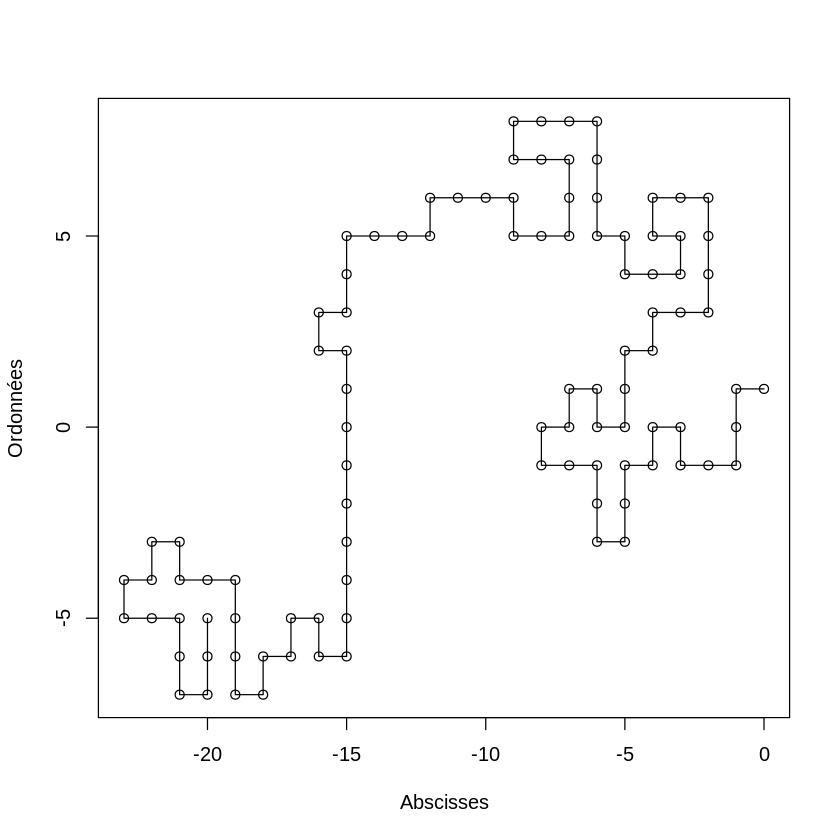

In [45]:
set.seed(2)
T <- 30

# On va essayer de simuler des chaînes de longueur T de manière uniforme. On aura pas à coup sûr 
# des chaînes de longueur T. Plus T est grand moins cela est probable  


direction <- matrix(c(0,0,1,-1,1,-1,0,0), nrow=4, ncol=2)
myope_algo_et_poids = function (T) 
{
    X_coord = cbind(0,0) # marche 
    poids = rep(4,1)  # vecteur des poids à chaque étape, partant de (0,0) les 4 directions sont disponibles 
    t=1
    while (t <= T)
    # Tant que la chaîne n'est pas bloquée
    {
        direction_dispo = matrix(nrow=0,ncol=2) # contient les directions qui sont faisables sans intersection
        # On cherche les directions faisables
        for (i in 1:4){
        if (!match(TRUE, direction[i,1]+X_coord[t,1] == X_coord[,1] & direction[i,2]+X_coord[t,2] == X_coord[,2], nomatch=0))
            {direction_dispo <- rbind(direction_dispo, direction[i,])}
        }
        long <- nrow(direction_dispo)  # nombre de directions disponibles
        
        if (long==0) {break}
        # S'il y a au moins une direction faisable, on en choisit une uniformément
        poids <- rbind(poids, long) # le poids de l'étape t correspond au nombre de directions disponibles à cet étape
        indice = floor(runif(1,min=1,max=long+1))
        X_coord <- rbind(X_coord, X_coord[t,] + direction_dispo[indice, ])
        t = t+1
    }
    return (cbind(X_coord,poids)[-1,])
}
start_time <- Sys.time()
Y = myope_algo_et_poids(100)
print(Sys.time() - start_time)
nrow(Y)
#print(Y)
plot(Y[,1:2], type='o', xlab='Abscisses', ylab='Ordonnées' )

#### Evolution de la probabilité qu'une chaîne générée par l'algorithme myope ne soit pas bloquée

Time difference of 3.9151 secs


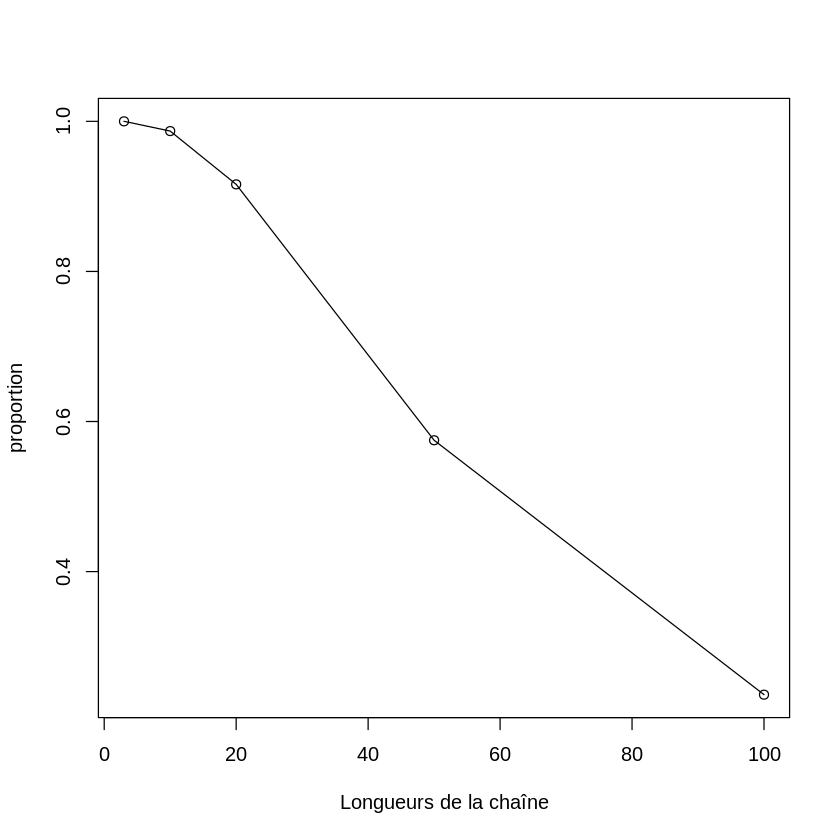

In [46]:
N = 1000 # nombre de simulations
start_time <- Sys.time()
# pour des longueurs de 10, 20,50,80,100,200,100 on va déterminer le pourcentage de simulations pour lesquelles la chaîne 
# ne se coupe pas avant d'atteindre la longueur
liste = c(3,10,20,50,100)
#liste = seq(1,500)
proportion = rep(0, length(liste))
for (k in seq(1,length(liste))){
    t = liste[k]
    for ( n in seq(1,N))
    {
        if (nrow(myope_algo_et_poids(t)) == t){
            proportion[k] = proportion[k] + 1}
    }
    proportion[k] = proportion[k]/N
}

print(Sys.time() - start_time)
plot(liste, proportion, type='o', xlab =  "Longueurs de la chaîne", ylab = "proportion" )

Comme nous pouvions nous y attendre la probabilité qu'une chaîne générée par l'algo myope soit d'une longueur $l$ dimimue avec $l$

L'algorithme myope induit une loi de probabilité discrète de densité $g$ sur l'ensemble $\mathcal{C}_T$ des chaînes de longueurs $T$.
En notant $w_m$ le nombre de directions disponibles à l'étape $m$, $$g(X)=\frac{1}{\prod_m w_m}$$  est la probablité que l'algorithme myope renvoit $X$

Dans la première partie, nous avons utilisé un algorithme qui consiste à simluer $X\sim \mathcal{U}(\mathcal{C}_T)$ dont la densité $f$ donnée par $$f(X)=\frac{1}{4^T}$$ 

#### Mise en oeuvre de l'importance sampling avec comme loi de proposition g

On estimera $\mathbb{P}(\tilde{l}_{s} = s)$ par l'estimateur importance sampling 
$$ \hat{p}_{IS} = \frac{1}{N} \sum_{k=1}^N \frac{f(X^{(k)})}{g(X^{(k)})}\mathbb{1}_{longueur(X^{(k)})=s}$$

Les $X^{(k)}$ sont $iid$ simulées par l'algorithme myope

In [0]:
Importance_Sampling <- function(T,N){
    # T durée de la chaîne, N nombre de simulations, l seuil , l<=T
    poids <- vector(length=N)
    nsim <- 0
    for (nsim in 1:N){
        resultat = myope_algo_et_poids(T)  # chaîne simulée
        if (nrow(resultat)==T){
            poids[nsim] <- prod(resultat[,3])
        }
    }
    valeur_estimee = sum(poids)/(4**T)/N
    ecart_type = sqrt( 1/N * sum( (poids/(4**T) - valeur_estimee)^2))

    borne_inf_intervalle_confiance = valeur_estimee - qnorm(0.975)  * sqrt(1/N) * ecart_type
    borne_sup_intervalle_confiance = valeur_estimee + qnorm(0.975) * sqrt(1/N) * ecart_type

    return (c(valeur_estimee, ecart_type, borne_inf_intervalle_confiance, borne_sup_intervalle_confiance))
}

#### Appréciation de l'estimateur lmportance Sampling

Ci-dessous les valeurs théoriques des probabilités qu'une marche aléatoire à $t$ pas soit de longueur $t=1,2,...,50$ 

In [0]:
P_theorique  <- c(4, 12, 36, 100, 284, 780, 2172,
                  5916, 16268, 44100, 120292, 324932, 881500, 
                  2374444, 6416596, 17245332, 46466676, 
                  124658732, 335116620, 897697164, 
                  2408806028, 6444560484, 17266613812, 46146397316, 123481354908, 329712786220, 
                  881317491628, 2351378582244, 6279396229332, 16741957935348, 44673816630956, 
                  119034997913020, 317406598267076, 845279074648708, 2252534077759844, 
                  5995740499124412, 15968852281708724, 42486750758210044, 113101676587853932, 
                  300798249248474268, 800381032599158340, 2127870238872271828, 
                  5659667057165209612, 15041631638016155884, 39992704986620915140, 
                  106255762193816523332, 282417882500511560972, 750139547395987948108, 
                  1993185460468062845836, 5292794668724837206644)
P_theorique  <- P_theorique/(4^seq(1,50))
#P_theorique

Time difference of 1.135227 mins
[1] "Erreurs relatives pour des longueurs entre 10 et 50:"


[1] 0.01980313

[1]  0.0009572245  0.0060616182 -0.0102690366 -0.0243959533  0.0155988850
[6] -0.0155203697 -0.0097246602 -0.0457081219 -0.0499922845

[1] "Largeur relative des intervalles de confiance :"


[1] 0.01953808 0.03040087 0.04167717 0.05539948 0.06880344 0.08398227 0.10338102
[8] 0.12659192 0.15259246

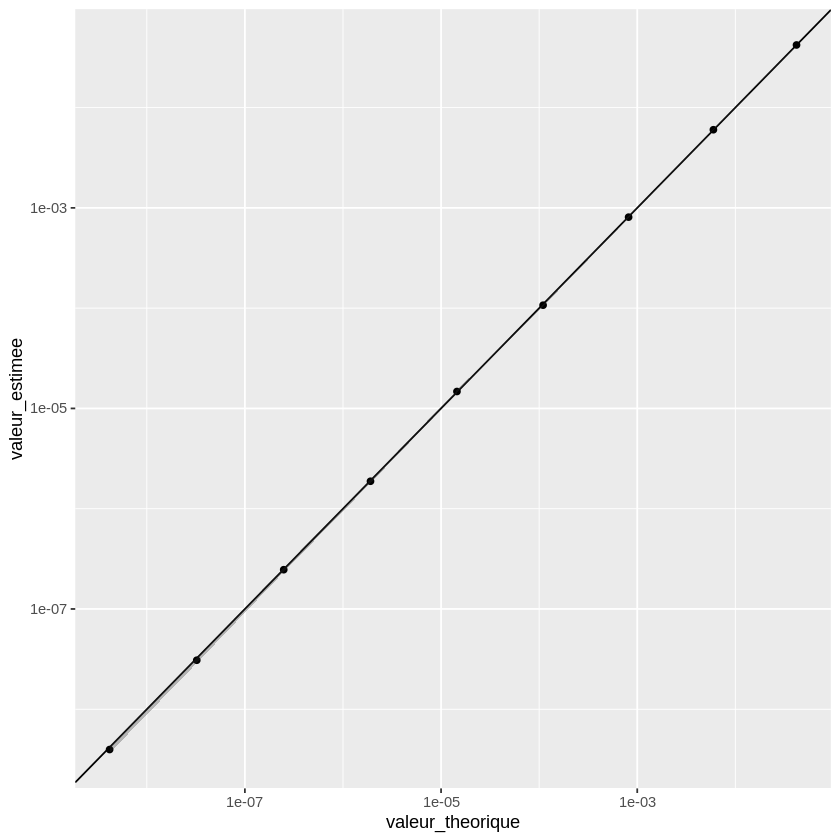

In [51]:
N <- 10000

estimation <- c()
start_time <- Sys.time()
for (T in seq(10,50,5)){
    estimation <- rbind(estimation, Importance_Sampling(T,N))
}
print(Sys.time() - start_time)


df <- data.frame(cbind(estimation, P_theorique[seq(10,50,5)]))
colnames(df) <- c("valeur_estimee", "ecart_type", "borne_inf", "borne_sup", "valeur_theorique")
ggplot(df, aes(valeur_theorique, valeur_estimee))+
    geom_point()+
    geom_abline(intercept=0, slope=1)+
    geom_ribbon(aes(ymin=borne_inf,ymax=borne_sup),alpha=0.3)+
    scale_x_continuous(trans = 'log10') +
    scale_y_continuous(trans = 'log10')

# Erreur relative :
print("Erreurs relatives pour des longueurs entre 10 et 50:")
mean(abs((estimation[,1]-P_theorique[seq(10,50,5)])/P_theorique[seq(10,50,5)]))
(estimation[,1]-P_theorique[seq(10,50,5)])/P_theorique[seq(10,50,5)]

# Largeur relative des intervalles de confiance :
print("Largeur relative des intervalles de confiance :")
(estimation[,4]-estimation[,3])/estimation[,1]

Time difference of 1.133249 mins
[1] "Erreurs relatives pour des longueurs entre 40 et 50:"


[1] 0.03449397

[1] -0.0007633212  0.0327638737  0.0270191348 -0.0829774026  0.0538533223
[6]  0.0095867784

[1] "Largeur relative des intervalles de confiance :"


[1] 0.1034767 0.1145164 0.1282254 0.1212818 0.1464063 0.1537064

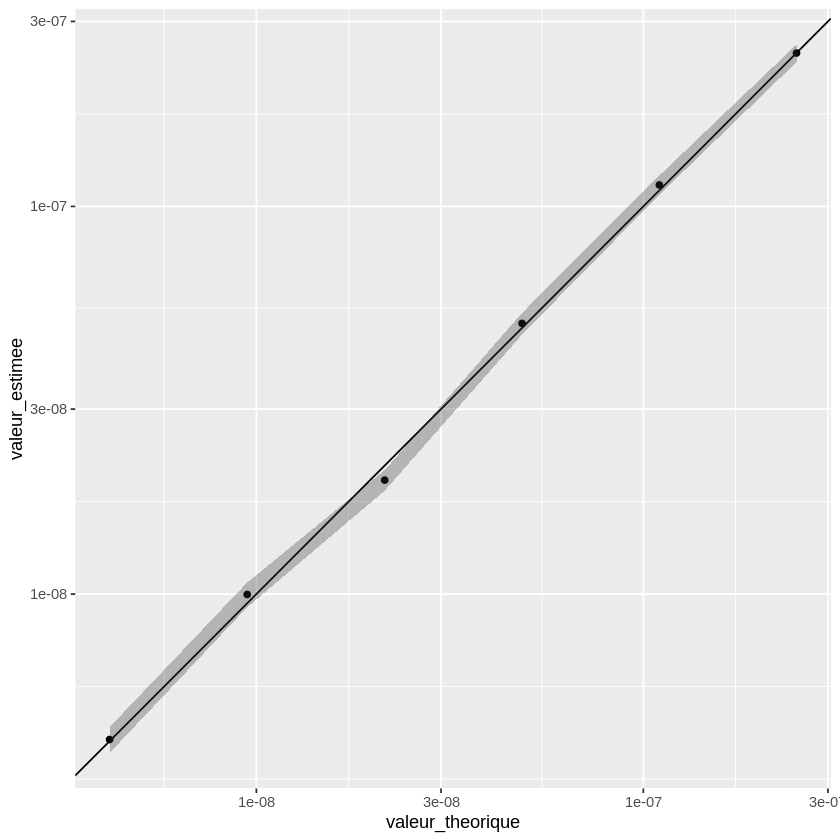

In [52]:
N <- 10000

estimation <- c()
start_time <- Sys.time()
for (T in seq(40,50,2)){
    estimation <- rbind(estimation, Importance_Sampling(T,N))
}
print(Sys.time() - start_time)

df <- data.frame(cbind(estimation, P_theorique[seq(40,50,2)]))
colnames(df) <- c("valeur_estimee", "ecart_type", "borne_inf", "borne_sup", "valeur_theorique")
ggplot(df, aes(valeur_theorique, valeur_estimee))+
    geom_point()+
    geom_abline(intercept=0, slope=1)+
    geom_ribbon(aes(ymin=borne_inf,ymax=borne_sup),alpha=0.3)+
    scale_x_continuous(trans = 'log10') +
    scale_y_continuous(trans = 'log10')

# Erreur relative :
print("Erreurs relatives pour des longueurs entre 40 et 50:")
mean(abs((estimation[,1]-P_theorique[seq(40,50,2)])/P_theorique[seq(40,50,2)]))
(estimation[,1]-P_theorique[seq(40,50,2)])/P_theorique[seq(40,50,2)]

# Largeur relative des intervalles de confiance :
print("Largeur relative des intervalles de confiance :")
(estimation[,4]-estimation[,3])/estimation[,1]

Pour N=10000 les intervalles de confiance générés contiennent les valeurs théoriques et sont de largeur croissante en T. Les erreurs sont de l'ordre de 2% en moyenne et sont proportionnelles à $\frac{1}{\sqrt{N}}$.
La complexité de l'algorithme est de O(N), et pour N=50000 on obtient une erreur moyenne inférieure à 1% et l'algorithme s'exécute en environ 1 minute, ce qui est satisfaisant.

#### Estimateur final

In [60]:
set.seed(1)
start_time <- Sys.time()
# Calcul de la probabilité que pour T = 50 la marche aléatoire dépasse l = 30 :
t <- 50
l <- 30
N <- 50000

# Etape 1: On calcule les probas que P(L_k)=0:
longueur <- monte_carlo_standard(t,N)
P0 <- apply((longueur[,1:(t-l)]==0), 2, sum)/N

# Etape 2 : On applique la formule pour trouver P(max(L)>l) :
Pl <- Importance_Sampling(l,N)[1]
s <- 0
for (k in 1:(t-l)){
    s <- s+P0[k]*Pl
}
s

print(Sys.time() - start_time)

[1] 7.141409e-05

Time difference of 54.73283 secs


La valeur estimée varie en moyenne de moins de 2% à chaque réestimation, ce qui indique que cette méthode est assez précise. Sa complexité est également de $\mathcal{O}(N)$.

## 4. Cross-entropy

Puisqu'en faisant varier le paramètre $p$ de la section 3.1 (Importance sampling avec probabilités $(p,p,q,q)$ ), on obtient des lois de proposition paramétriques, on peut appliquer la méthode de Cross-entropy pour évènements rares présentée dans le papier "A Tutorial on the Cross-Entropy Method"$^{[3]}$ afin de déterminer le paramètre $p$ optimal et calculer la probabilité cherchée,  $\mathbb{P}(S(X) \geq s)$ avec $S(X) = max$ $l_i(X)$, c'est-à-dire la probabilité qu'une autosécante de $X$ ait une longueur dépassant $s$.

On note $f\left(·; \boldsymbol{p}\right)$ la loi de proposition de paramètre $p$, $\hspace{0.1in} u=0.25$ le paramètre associé à la densité uniforme, et $W\left(X ;u,w\right) = \frac{f(X;u)}{f(X;w)}$ le poids de la marche aléatoire $X$. Pour alléger la notation, on note $X_i$ la marche aléatoire notée précédemment $X^{(i)}$

L'algorithme se présente comme suit : 
1. On définit $\hat{p_0} \in ]0,0.5[$ et le compteur $t=1$.
2. On génère les marches aléatoires $X_1, . . . , X_N$ avec la loi de proposition $f(·; \hat{p}_{t-1})$ et on détermine le (1−$\rho$)-quantile des $(S(X_k))_{k \in 1..N}$ qu'on notera $\hat{\gamma}_t$. Si $\hat{\gamma}_t > s$ on pose $\hat{\gamma}_t = s$.
3. Utiliser l'échantillon $X_1, . . . , X_N$ simulé pour résoudre le programme d'optimisation:

$ \hspace{1in} \hat{p_t} = \underset{\boldsymbol{p}}{max} \frac{1}{N} \sum_{i=1}^{N} 1_{\left\{S\left(X_i\right) \geq \hat{\gamma}_{t}\right\}} W\left(X_i ; u, \hat{p}_{t-1}\right) \ln f\left(X_i ; p\right)$

4. Si $\hat{\gamma}_t < s$, on pose $t = t + 1$ et on réitère les étapes 2 et 3. Sinon on continue à l'étape 5.
5. Estimer la probabilité cherchée par :

$\hspace{1in} \widehat{\mathbb{P}}=\frac{1}{N} \sum_{i=1}^{N} 1_{\left\{S\left(X_{i}\right) \geq s\right\}} W\left(X_{i} ; u, \widehat{p}_{t}\right)$

Il s'agit d'une méthode itérative où on simule un échantillon puis on détermine le paramètre $\hat{p}$ avec les $\rho$ "meilleures" simulations en utilisant l'estimateur du maximum de vraisemblance pondéré par les poids $W$. Avec le nouveau paramètre $\hat{p}$ on peut simuler de nouveau $N$ marches aléatoires... On réitère ce processus jusqu'à ce que l'évènement $1_{\left\{S\left(\boldsymbol{X}_{i}\right) \geq s\right\}} $ se réalise sur $\rho$ % des simulations, c'est-à-dire qu'il n'est plus rare, avant d'estimer $\widehat{\mathbb{P}}$ par importance sampling avec le dernier paramètre $\hat{p_t}$.

Pour calculer l'estimateur du maximum de vraisemblance pondéré de $p$, on maximise sur $p$ le terme suivant:

$ \hspace{1in}  \frac{1}{N} \sum_{i=1}^{N} 1_{\left\{S\left(X_i\right) \geq \hat{\gamma}_{t}\right\}} W\left(X_i ; u, \hat{p}_{t-1}\right) \ln (f\left(X_i ; p\right))$

$ \hspace{1in} = \frac{1}{\rho N} \sum_{i=1}^{\rho N} W\left(X_{i}, u, \hat{p}_{t-1}\right) \ln \left(f\left(X_{i}, p\right)\right)$

$\hspace{1in} = \frac{1}{\rho N} \sum_{i=1}^{\rho N} \frac{f\left(X_{i}, u\right)}{f\left(X_{i}, \hat{p}_{t-1}\right)} \ln \left(f\left(X_{i}, p\right)\right)$

$\hspace{1in} = \frac{1}{\rho N} \sum_{i=1}^{\rho N} \frac{1 / 4^T}{f\left(X_{i}, \hat{p}_{t-1}\right)} \ln(p^{nb}\left(\frac{1}{2}-p\right)^{T-nb}) $ avec $nb$ le nombre de pas en haut ou à droite.

$\hspace{1in} = \frac{1}{\rho N} \sum_{1}^{\rho N} \frac{1}{4^T} \frac{n b \ln (p)+(T-nb) \ln \left(\frac{1}{2} -p\right)}{f\left(X_{i}, \hat{p}_{t-1}\right)} $ 

Cette quantité est maximisée lorsque sa dérivée s'annule, d'où :

$\hspace{1in} \sum_{i=1}^{\rho N} \left( \frac{\frac{n b}{p}+\frac{(T-n b)}{\frac{1}{2}-p}}{f\left(X_{i}, \hat{p}_{t-1}\right)} \right) = 0$ 

$\hspace{0.75in} \Rightarrow \sum_{i=1}^{\rho N} \left( \frac{\frac{n b}{2}-T p}{f\left(X_{i}, \hat{p}_{t-1}\right)} \right) = 0 $ 

$\hspace{0.75in} \Rightarrow \sum_{i=1}^{\rho N} \left( \frac{\frac{n b}{2}-T p}{f\left(X_{i}, \hat{p}_{t-1}\right)} \right) = 0 $ 

$\hspace{0.75in} \Rightarrow \hat{p}_t=\frac{\sum_{i=1}^{\rho n}\left(\frac{nb}{f\left(X_{i}, \hat{p}_{t-1}\right)}\right)}{\sum_{i=1}^{\rho n}\left(\frac{2T}{f\left(X_{i}, \hat{p}_{t-1}\right)}\right)} $

avec $f\left(X_{i}, \hat{p}_{t-1}\right) = \hat{p}_{t-1}^{n b}\left(\frac{1}{2}-\hat{p}_{t-1}\right)^{T-nb}$.

Cet estimateur est intuitif, puisque $\frac{nb}{2T}$ est l'estimateur du maximum de vraisemblance sur une seule simulation $X$.

$\hat{p}_t$ pondère ces estimations par les poids de l'importance sampling pour favoriser les simulations ayant le plus de poids.

In [62]:
#### Cross-entropy ####

rho <- 0.1
p <- 0.4
q <- 0.5-p
k <- 1
repeat{
  t <- 50
  s <- 30
  N <- 10000
  longueur <- matrix(ncol=t, nrow=N)  # matrice de la longueur de la maas i à la date j
  poids <- vector(length=N) # poids de la simulation i
  nb_hd <- vector(length=N) # nombre de pas en haut ou à droite de la simulation i
  start_time <- Sys.time()
  directions <- function(x){
    # On associe chaque x entre 0 et 1 à une direction :
    if (x<p){return(c(1,0))}
    else if (x<2*p){return(c(0,1))}
    else if (x<2*p+q){return(c(-1,0))}
    else{return(c(0,-1))}
  }
  for (n in 1:N){
    # On génère une suite aléatoire dans [[0,3]]^(t+1)
    X <- runif(t+1)
    # On calcule le poids de la marche aléatoire générée
    nb_hd[n] <- sum(X[-length(X)]<2*p)
    poids[n] <- (p^nb_hd[n])*(q^(t-nb_hd[n]))
    # On associe chaque élément à une direction :
    X <- matrix(unlist(lapply(X, directions)), ncol=2, byrow=TRUE)
    # On calcule les coordonnées à chaque instant t
    X_coord <- apply(X, 2, cumsum)
    # On visualise un échantillon de la marche aléatoire
    #plot(X_coord[1:50,], type='o')
    
    # On la divise en marches aléatoires auto-sécantes
    current <- cbind(0,0)
    i <- 1
    
    while (i<=t){
      while(i<=t & !match(TRUE, X_coord[i,1] == current[,1] & X_coord[i,2] == current[,2], nomatch=0)){
        # Tant que le point actuel (X_coord[i,]) n'a pas déjà été visité on l'ajoute à current
        longueur[n,i] <- length(current)/2
        current <- rbind(current,X_coord[i,])
        i <- i+1
      }
      current <- matrix(nrow = 0, ncol = 2)  # on réinitialise current
    }
  }
    
  Pm <- apply(longueur, 1, function(x){max(x)})
  id <- which(Pm>quantile(Pm,1-rho))
  # On calcule l'estimateur du maximum de vraisemblance de p sur les simulations du 10ème décile
  p <- sum(nb_hd[id]/poids[id]) / (2*t*sum(1/poids[id]))
  
  #p <- mean(nb_hd[id]/2/t)  # si on essaye une moyenne non pondérée par les poids, p converge vers 0 si p_0<0.25, et 0.5 si p_0>0.25
  q <- 0.5-p
  cat("itération",k,"\n")
  cat("p=",p,"\n")

  cat("quantile :",as.numeric(quantile(Pm,1-rho)),"\n","\n")
  
  

  if ((k>= 10) | (quantile(Pm,1-rho) > s)) {break}

  k<- k+1
} 
# Résultat :
Pm <- apply(longueur, 1, function(x){max(x)>=s})
valeur_estimee <- sum(Pm/poids)/(4^t)/N


itération 1 
p= 0.350925 
quantile : 24 
 
itération 2 
p= 0.2902923 
quantile : 17 
 
itération 3 
p= 0.2387072 
quantile : 14 
 
itération 4 
p= 0.2510568 
quantile : 13 
 
itération 5 
p= 0.2493643 
quantile : 13 
 
itération 6 
p= 0.247394 
quantile : 13 
 
itération 7 
p= 0.2496798 
quantile : 13 
 
itération 8 
p= 0.2482972 
quantile : 13 
 
itération 9 
p= 0.2484866 
quantile : 13 
 
itération 10 
p= 0.2523345 
quantile : 13 
 


En applicant la méthode Cross-Entropy, on constate que le paramètre p converge toujours vers $0.25$, c'est-à-dire que la loi de proposition converge vers la loi initiale avec probabilité uniforme. Cela est dû au fait que la méthode Cross-entropy pondère les simulations par leur poids pour déterminer le paramètre $p$, et le poids des simulations est maximal pour $p=0.25$ donc les simulations les plus proches de la loi uniforme ont le plus de poids pour déterminer $p$. Cela est valable pour les autres lois de proposition possibles : L'algorithme converge toujours vers la loi uniforme.

Il s'avère donc que l'algorithme Cross-entropy ne s'applique pas dans notre problématique.

## Références bibliographiques

[1] Art Owen , Importance Sampling, 2009–2013,2018

[2] Sergio Caraccioloa, Anthony J. Guttmannb, Iwan Jensenb, Andrea Pelissettoc , Andrew N. Rogersb, Alan D. Sokal;  Correction-to-Scaling Exponents for Two-Dimensional Self-Avoiding Walks, 2005 

[3]  Pieter-Tjerk de Boer, Dirk P. Kroese, Shie Mannor and Reuven Y. Rubinstein; A Tutorial on the Cross-Entropy Method, 2003